In [16]:
import pandas as pd
from pathlib import Path
import seaborn as sns

In [25]:
all_results = []
for f in Path('../auditory_brain_dnn/results').rglob('*df_output.pkl'):
    model = f.parts[-3]
    layer = int(f.parts[-2].split('_')[2].split('-')[-1])
    df = pd.read_pickle(f)
    df['layer'] = layer
    df['model'] = model
    all_results.append(df)
    

In [26]:
components = ['Low freq','High freq','Broadband','Pitch','Speech','Music']

all_results = pd.concat(all_results)
all_results['component_name'] = all_results['voxel_id'].apply(lambda x: components[x])

In [18]:
df

,mean_r_prior_zero_test,median_r_prior_zero_test,mean_r_test,median_r_test,mean_r2_test,median_r2_test,std_r2_test,mean_r2_test_c,median_r2_test_c,std_r2_test_c,...,voxel_id,vox_idx_coord,comp,comp_idx,source_model,source_layer,randnetw,target,layer,model
voxel_id,,,,,,,,,,,,,,,,,,,,,
0,0.886673,0.892444,0.886673,0.892444,0.786547,0.796457,0.033396,0.0,0.0,0.0,...,0,0,lowfreq,0,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma
1,0.847787,0.848181,0.847787,0.848181,0.719444,0.719417,0.045415,0.0,0.0,0.0,...,1,1,highfreq,1,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma
2,0.744298,0.760715,0.744298,0.760715,0.555781,0.578743,0.061213,0.0,0.0,0.0,...,2,2,envsounds,2,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma
3,0.924083,0.923383,0.924083,0.923383,0.854090,0.852643,0.023316,0.0,0.0,0.0,...,3,3,pitch,3,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma
4,0.929756,0.925189,0.929756,0.925189,0.864721,0.855977,0.030903,0.0,0.0,0.0,...,4,4,speech,4,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma
5,0.889007,0.890196,0.889007,0.890196,0.790397,0.792450,0.014165,0.0,0.0,0.0,...,5,5,music,5,mel256-ec-base-fma,6,False,NH2015comp,6,mel256-ec-base-fma


<Axes: xlabel='layer', ylabel='median_r2_test'>

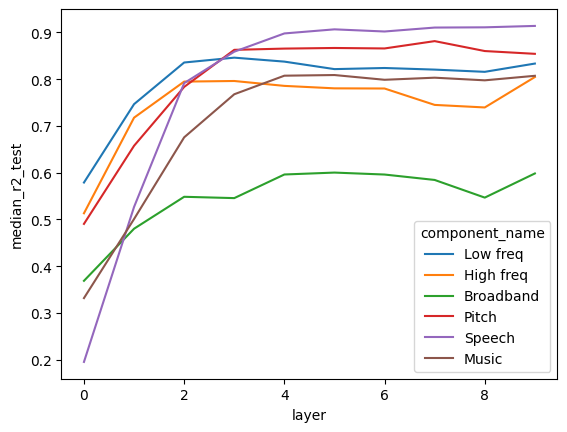

In [27]:
sns.lineplot(all_results.loc[all_results['model']=='mel256-ec-base'], x='layer', y='median_r2_test', hue='component_name')

<Axes: xlabel='layer', ylabel='median_r2_test'>

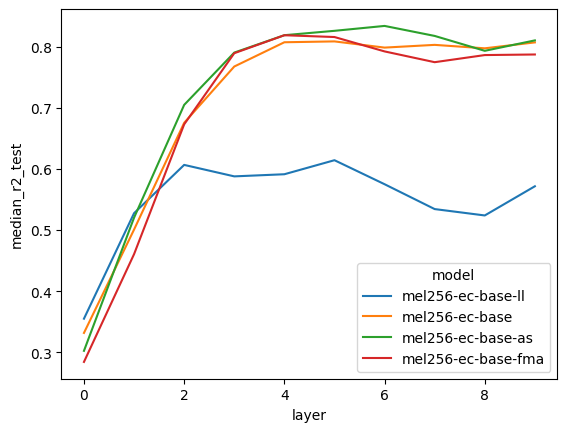

In [28]:
sns.lineplot(all_results.loc[all_results['component_name']=='Music'], x='layer', y='median_r2_test', hue='model')

<Axes: xlabel='layer', ylabel='median_r2_test'>

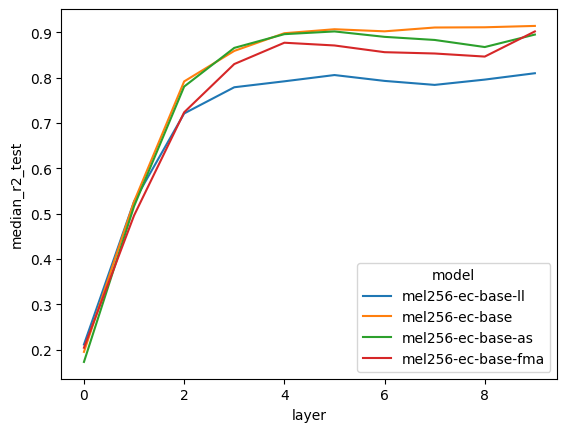

In [29]:
sns.lineplot(all_results.loc[all_results['component_name']=='Speech'], x='layer', y='median_r2_test', hue='model')